# Synthetic Data Generation
This Notebook is used to create synthetic data for the outlier detection experiment

In [29]:
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as dt
import seaborn as sns
import matplotlib.transforms as mtrans
sns.set()
SEED = 42
np.random.seed(SEED)
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [52]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=17)  # fontsize of the figure title

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


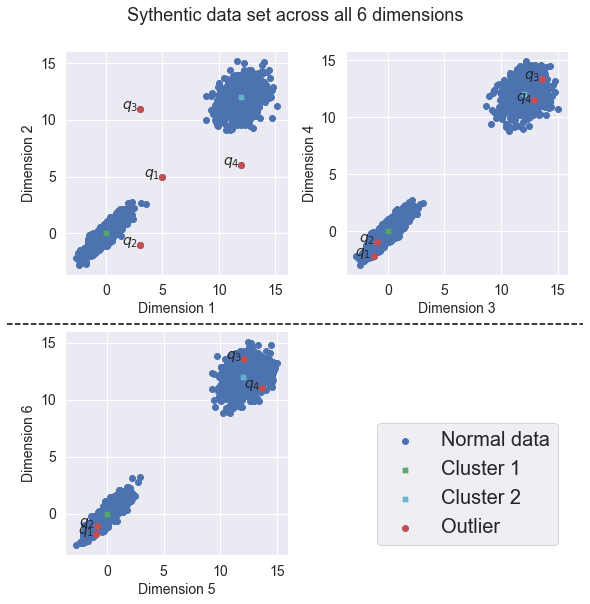

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
axes = ax
ax = ax.flatten()

np.random.seed(0)

CLUSTERS = 2
DIMENSIONS = 6

SAMPLE_SIZE=1000

x = []

means = (np.full(DIMENSIONS, 0), np.full(DIMENSIONS, 12))

cov1 = np.full((DIMENSIONS, DIMENSIONS), 0.9)
np.fill_diagonal(cov1, 1)

cov2 = np.full((DIMENSIONS, DIMENSIONS), 0.3)
np.fill_diagonal(cov2, 1)

covs = [cov1, cov2]

for c in range(CLUSTERS):
    mean = means[c]
    cov = covs[c]
    x.extend(np.random.multivariate_normal(mean, cov, SAMPLE_SIZE))

    
x = np.array(x)
label = np.ones(len(x))


# Introduce 4 outliers on the first two dimension
x[0, 0] = 5
x[0, 1] = 5

x[1, 0] = 3
x[1, 1] = -1

x[1001, 0] = 3
x[1001, 1] = 11

x[1002, 0] = 12
x[1002, 1] = 6

label[0] = 0
label[1] = 0
label[1001] = 0

outlier_idx = [0, 1, 1001, 1002]

for i, d in enumerate(range(0, DIMENSIONS, 2)):

    ax[i].scatter(x[:,d],
                                  x[:,d+1],
                                  c="b",
                                  label="Normal data")
    ax[i].scatter(0, 0, label="Cluster 1", marker="X", c="g", s=30)
    ax[i].scatter(12, 12, label="Cluster 2", marker="X", c="c", s=30)
    ax[i].scatter(x[outlier_idx][:,d], x[outlier_idx][:,d+1], c="r", label="Outlier")
    ax[i].set_xlabel(f"Dimension {d+1}")
    ax[i].set_ylabel(f"Dimension {d+2}")
    #ax[i].set_title(f"Dimension {d+1} and Dimension {d+2}")
    #ax[i].legend(loc="lower right")
    for j, o in enumerate(outlier_idx):
        ax[i].text(x[o, d]-1.6,x[o, d+1],f'$q_{j+1}$')
ax[-1].axis('off')
ax[-1].legend(*ax[-2].get_legend_handles_labels(), loc='lower right', prop={'size': 20})
fig.tight_layout()

# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)
fig.suptitle("Sythentic data set across all 6 dimensions", y=1.05)
plt.savefig("images/synthetic_data.eps", bbox_inches="tight")
plt.show()
df = pd.DataFrame(x, columns=[f"f{d}" for d in range(DIMENSIONS)])

In [111]:
df.to_csv(f"data/synthetic_data_{DIMENSIONS}d.csv")